In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
ds = pd.read_csv('fer2013/fer2013.csv')

In [3]:
ds.head()

,emotion,pixels,Usage
0,0,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...,Training
1,0,151 150 147 155 148 133 111 140 170 174 182 15...,Training
2,2,231 212 156 164 174 138 161 173 182 200 106 38...,Training
3,4,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...,Training
4,6,4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...,Training


In [4]:
ds.shape

(35887, 3)

In [5]:
# Drop the usage column
ds.drop("Usage", axis=1, inplace=True)

In [6]:
ds[ds.duplicated()]

,emotion,pixels
675,5,255 255 255 255 255 255 255 237 217 146 185 11...
718,2,114 95 82 84 85 120 108 97 83 64 68 85 80 86 1...
1145,5,205 204 205 205 204 203 203 203 202 202 203 20...
1266,3,201 218 246 178 74 62 63 78 85 83 71 65 64 67 ...
1289,5,238 69 24 32 34 33 27 30 41 49 60 64 47 65 80 ...
...,...,...
35826,2,200 201 199 197 198 199 199 198 197 196 194 19...
35833,5,254 254 254 254 254 253 252 254 113 36 62 69 6...
35874,5,43 43 51 73 94 97 102 95 99 107 126 144 154 17...
35875,5,248 251 239 144 102 95 82 77 91 138 153 145 14...


In [7]:
# Drop duplicate rows (keep the only the first occurrence)
ds.drop_duplicates(inplace=True)

In [8]:
ds[ds.isna().any(axis=1)]

,emotion,pixels


In [11]:
# Shape of dataset after dropping samples
ds.shape

(34094, 2)

In [12]:
expressions = {0:"Angry", 1:"Disgust", 2:"Fear", 3:"Happy", 4:"Sad", 5:"Surprise", 6:"Neutral"}

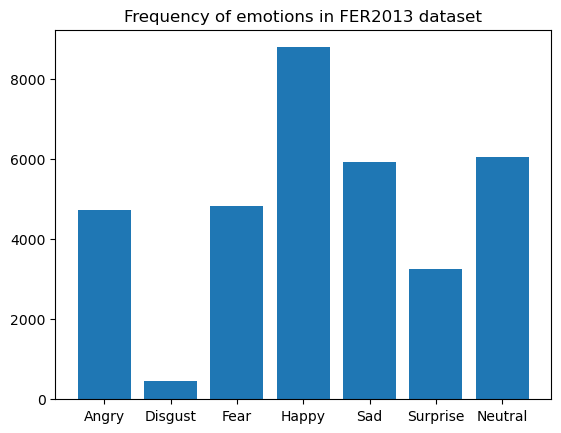

In [13]:
# get frequency of different emotions in FER2013
emotion_freq = dict()

for i in range(7):
  emotion_freq[expressions[i]] = ds['emotion'].value_counts()[i]

fig, ax = plt.subplots()
ax.bar(emotion_freq.keys(), emotion_freq.values())
ax.set_title("Frequency of emotions in FER2013 dataset")

plt.show()

In [14]:
# Number of images that are classified as more than one emotion
duplicates = ds[ds["pixels"].duplicated(keep=False)] # All rows with duplicate pixels are considered duplicates
duplicate_pixels = duplicates.pixels.unique() # 1 row for each image that has multiple classifications

In [15]:
# 57 images
duplicate_pixels.shape

(57,)

Neutral Angry 

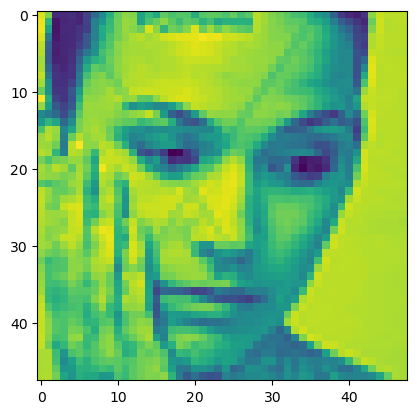

In [16]:
# Display an image which is classified as being more than 1 emotion
# Print both emotions the image was classified as

pxs = duplicate_pixels[11] # Set the image # here (0-56)
rows = ds[ds.pixels == pxs]
emotions = rows.emotion
for emotion in emotions:
    print(expressions[emotion], end=" ")

im = np.fromstring(pxs, dtype=int, sep=" ")
plt.imshow(im.reshape(48,48,1).astype('float32'))

Emotion Categories:
- Angry: 4740 images
- Disgust: 461 images
- Fear: 4835 images
- Happy: 8800 images
- Sad: 5934 images
- Surprise: 3267 images
- Neutral: 6057 images

Total Images: 34094

1793 images were dropped from the initial 35887 images during preprocessing/cleaning

57 images were assigned more than one emotion

Display an image

In [17]:
labels = ds.iloc[:,[0]].values # array containing the 'emotion' column of ints (0-6)
pixel_list = ds['pixels']

# convert each string of pixel values into an np array with shape (48^2,) and store these arrays in an array
images = np.array([np.fromstring(pixels, dtype=int, sep=" ") for pixels in pixel_list])

'Happy'

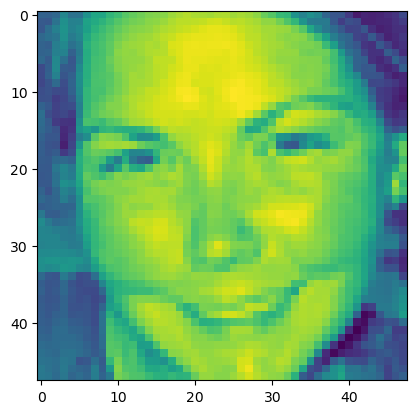

In [18]:
# reshape the image to display
img_num = 8
image = images[img_num].reshape(48,48,1).astype('float32')

# display the image
plt.imshow(image)
expressions[labels[img_num][0]]

In [20]:
# Write the df to a CSV
ds.to_csv("FER2013.csv", index=False)